# Lego Database
Preguntas a responder:
- ¿Cómo evolucionaron los sets de lego en tamaño a través de los años?
- ¿Existe alguna asociación entre los colores y las temáticas?
- ¿Podría predecir a que temática pertenece un set basado en el
contenido de este?
- A través de los años, ¿Cuál o cuáles son los sets que tienen las piezas más
raras?
- ¿Cómo evolucionaron los colores en los sets de lego a través de los
años?

Dataset schema:

![dataset-schema](./imgs/downloads_schema.png)

In [43]:
# Dependencies
import matplotlib.pyplot as plt
from matplotlib import figure
import pandas as pd
import seaborn as sns
import seaborn.objects as so

# Global vars
DATASET_PATH = "./data/"

## Exploración y comprensión de los datos:
- Cargar el dataset proporcionado y realizar un análisis exploratorio de los datos.

In [10]:
inventory_parts_df = pd.read_csv(DATASET_PATH + "inventory_parts.csv")
print("is_spare possible values:", inventory_parts_df["is_spare"].unique())
inventory_parts_df.is_spare = inventory_parts_df.is_spare.map(lambda x: x == "t")
print("Amount of entries in inventory parts:", len(inventory_parts_df))
inventory_parts_df.head()

is_spare possible values: ['f' 't']
Amount of entries in inventory parts: 580251


,inventory_id,part_num,color_id,quantity,is_spare
0,1,48379c01,72,1,False
1,1,48395,7,1,False
2,1,mcsport6,25,1,False
3,1,paddle,0,1,False
4,3,11816pr0005,78,1,False


In [11]:
inventory_sets_df = pd.read_csv(DATASET_PATH + "inventory_sets.csv")
print("Amount of entries in inventory sets:", len(inventory_sets_df))
inventory_sets_df.head()

Amount of entries in inventory sets: 2846


,inventory_id,set_num,quantity
0,35,75911-1,1
1,35,75912-1,1
2,39,75048-1,1
3,39,75053-1,1
4,50,4515-1,1


In [12]:
colors_df = pd.read_csv(DATASET_PATH + "colors.csv")
colors_df.is_trans = colors_df.is_trans.map(lambda x: x == "t")
colors_df.rename(columns={col_label: "color_" + col_label for col_label in colors_df}, inplace=True)
print("Amount of entries in colors:", len(colors_df))
colors_df.head()

Amount of entries in colors: 135


,color_id,color_name,color_rgb,color_is_trans
0,-1,Unknown,0033B2,False
1,0,Black,05131D,False
2,1,Blue,0055BF,False
3,2,Green,237841,False
4,3,Dark Turquoise,008F9B,False


Inventory parts and color dataframes composition

In [13]:
inventory_parts_df = pd.merge(inventory_parts_df, colors_df, on="color_id")
inventory_parts_df.head()

,inventory_id,part_num,color_id,quantity,is_spare,color_name,color_rgb,color_is_trans
0,1,48379c01,72,1,False,Dark Bluish Gray,6C6E68,False
1,1,48395,7,1,False,Light Gray,9BA19D,False
2,1,mcsport6,25,1,False,Orange,FE8A18,False
3,1,paddle,0,1,False,Black,05131D,False
4,3,11816pr0005,78,1,False,Light Flesh,F6D7B3,False


In [14]:
inventories_df = pd.read_csv(DATASET_PATH + "inventories.csv")
inventories_df.rename(columns={"id": "inventory_id", "version": "inventory_version"}, inplace=True)
print("Amount of entries in inventories:", len(inventories_df))
inventories_df.head()

Amount of entries in inventories: 11681


,inventory_id,inventory_version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [15]:
sets_df = pd.read_csv(DATASET_PATH + "sets.csv")
print("Amount of entries in sets:", len(sets_df))
sets_df.head()

Amount of entries in sets: 11673


,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [16]:
df = pd.merge(inventories_df, sets_df, on="set_num")
df.head()

,inventory_id,inventory_version,set_num,name,year,theme_id,num_parts
0,1,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
1,3,1,3931-1,Emma's Splash Pool,2012,494,43
2,4,1,6942-1,Zo Weevil,1999,134,20
3,15,1,5158-1,"T-Junction, Circle Plates",1990,454,2
4,16,1,903-1,Train Wheels and Couplers,1969,371,10


In [17]:
new_df = pd.merge(inventory_parts_df, df, on="inventory_id")
new_df.head()

,inventory_id,part_num,color_id,quantity,is_spare,color_name,color_rgb,color_is_trans,inventory_version,set_num,name,year,theme_id,num_parts
0,1,48379c01,72,1,False,Dark Bluish Gray,6C6E68,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
1,1,48395,7,1,False,Light Gray,9BA19D,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
2,1,mcsport6,25,1,False,Orange,FE8A18,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
3,1,paddle,0,1,False,Black,05131D,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4
4,3,11816pr0005,78,1,False,Light Flesh,F6D7B3,False,1,3931-1,Emma's Splash Pool,2012,494,43


In [76]:
new_new_df = pd.merge(new_df, themes_df, on="theme_id")
new_new_df.head()

,inventory_id,part_num,color_id,quantity,is_spare,color_name,color_rgb,color_is_trans,inventory_version,set_num,name,year,theme_id,num_parts,year_binned,theme_name,theme_parent_id
0,1,48379c01,72,1,False,Dark Bluish Gray,6C6E68,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,"(2003.6, 2010.3]",Gravity Games,458.0
1,1,48395,7,1,False,Light Gray,9BA19D,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,"(2003.6, 2010.3]",Gravity Games,458.0
2,1,mcsport6,25,1,False,Orange,FE8A18,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,"(2003.6, 2010.3]",Gravity Games,458.0
3,1,paddle,0,1,False,Black,05131D,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,"(2003.6, 2010.3]",Gravity Games,458.0
4,3,11816pr0005,78,1,False,Light Flesh,F6D7B3,False,1,3931-1,Emma's Splash Pool,2012,494,43,"(2010.3, 2017.0]",Friends,NaN


In [18]:
print(len(new_df))
print(len(new_df["part_num"].unique()))
print(len(new_df["year"].unique()))

580251
23131
66


In [19]:
new_df["year_binned"] = pd.cut(new_df["year"], bins=10)
new_df.head()

,inventory_id,part_num,color_id,quantity,is_spare,color_name,color_rgb,color_is_trans,inventory_version,set_num,name,year,theme_id,num_parts,year_binned
0,1,48379c01,72,1,False,Dark Bluish Gray,6C6E68,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,"(2003.6, 2010.3]"
1,1,48395,7,1,False,Light Gray,9BA19D,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,"(2003.6, 2010.3]"
2,1,mcsport6,25,1,False,Orange,FE8A18,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,"(2003.6, 2010.3]"
3,1,paddle,0,1,False,Black,05131D,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,"(2003.6, 2010.3]"
4,3,11816pr0005,78,1,False,Light Flesh,F6D7B3,False,1,3931-1,Emma's Splash Pool,2012,494,43,"(2010.3, 2017.0]"


In [100]:
new_df.query("year == 2004")

,inventory_id,part_num,color_id,quantity,is_spare,color_name,color_rgb,color_is_trans,inventory_version,set_num,name,year,theme_id,num_parts,year_binned
0,1,48379c01,72,1,False,Dark Bluish Gray,6C6E68,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,"(2003.6, 2010.3]"
1,1,48395,7,1,False,Light Gray,9BA19D,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,"(2003.6, 2010.3]"
2,1,mcsport6,25,1,False,Orange,FE8A18,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,"(2003.6, 2010.3]"
3,1,paddle,0,1,False,Black,05131D,False,1,7922-1,McDonald's Sports Set Number 6 - Orange Vest S...,2004,460,4,"(2003.6, 2010.3]"
792,40,2412b,15,2,False,White,FFFFFF,False,1,6963-1,X-wing Fighter - Mini (Kabaya Box),2004,159,41,"(2003.6, 2010.3]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558717,16411,clikits102,89,2,False,Royal Blue,4C61DB,False,1,10083-1,Birthday Pack Star,2004,500,70,"(2003.6, 2010.3]"
558718,16411,clikits202,383,1,False,Chrome Silver,E0E0E0,False,1,10083-1,Birthday Pack Star,2004,500,70,"(2003.6, 2010.3]"
558719,16411,clikits202,41,1,False,Trans-Light Blue,AEEFEC,True,1,10083-1,Birthday Pack Star,2004,500,70,"(2003.6, 2010.3]"
558720,16411,clikits214,89,2,False,Royal Blue,4C61DB,False,1,10083-1,Birthday Pack Star,2004,500,70,"(2003.6, 2010.3]"


In [20]:
part_categories_df = pd.read_csv(DATASET_PATH + "part_categories.csv")
print("Amount of entries in part categories:", len(part_categories_df))
part_categories_df.head()

Amount of entries in part categories: 57


,id,name
0,1,Baseplates
1,2,Bricks Printed
2,3,Bricks Sloped
3,4,"Duplo, Quatro and Primo"
4,5,Bricks Special


In [21]:
parts_df = pd.read_csv(DATASET_PATH + "parts.csv")
print("Amount of entries in parts:", len(parts_df))
parts_df.head()

Amount of entries in parts: 25993


,part_num,name,part_cat_id
0,0687b1,Set 0687 Activity Booklet 1,17
1,0901,Baseplate 16 x 30 with Set 080 Yellow House Print,1
2,0902,Baseplate 16 x 24 with Set 080 Small White Hou...,1
3,0903,Baseplate 16 x 24 with Set 080 Red House Print,1
4,0904,Baseplate 16 x 24 with Set 080 Large White Hou...,1


### Evolución de los sets en tamaño a lo largo de los años

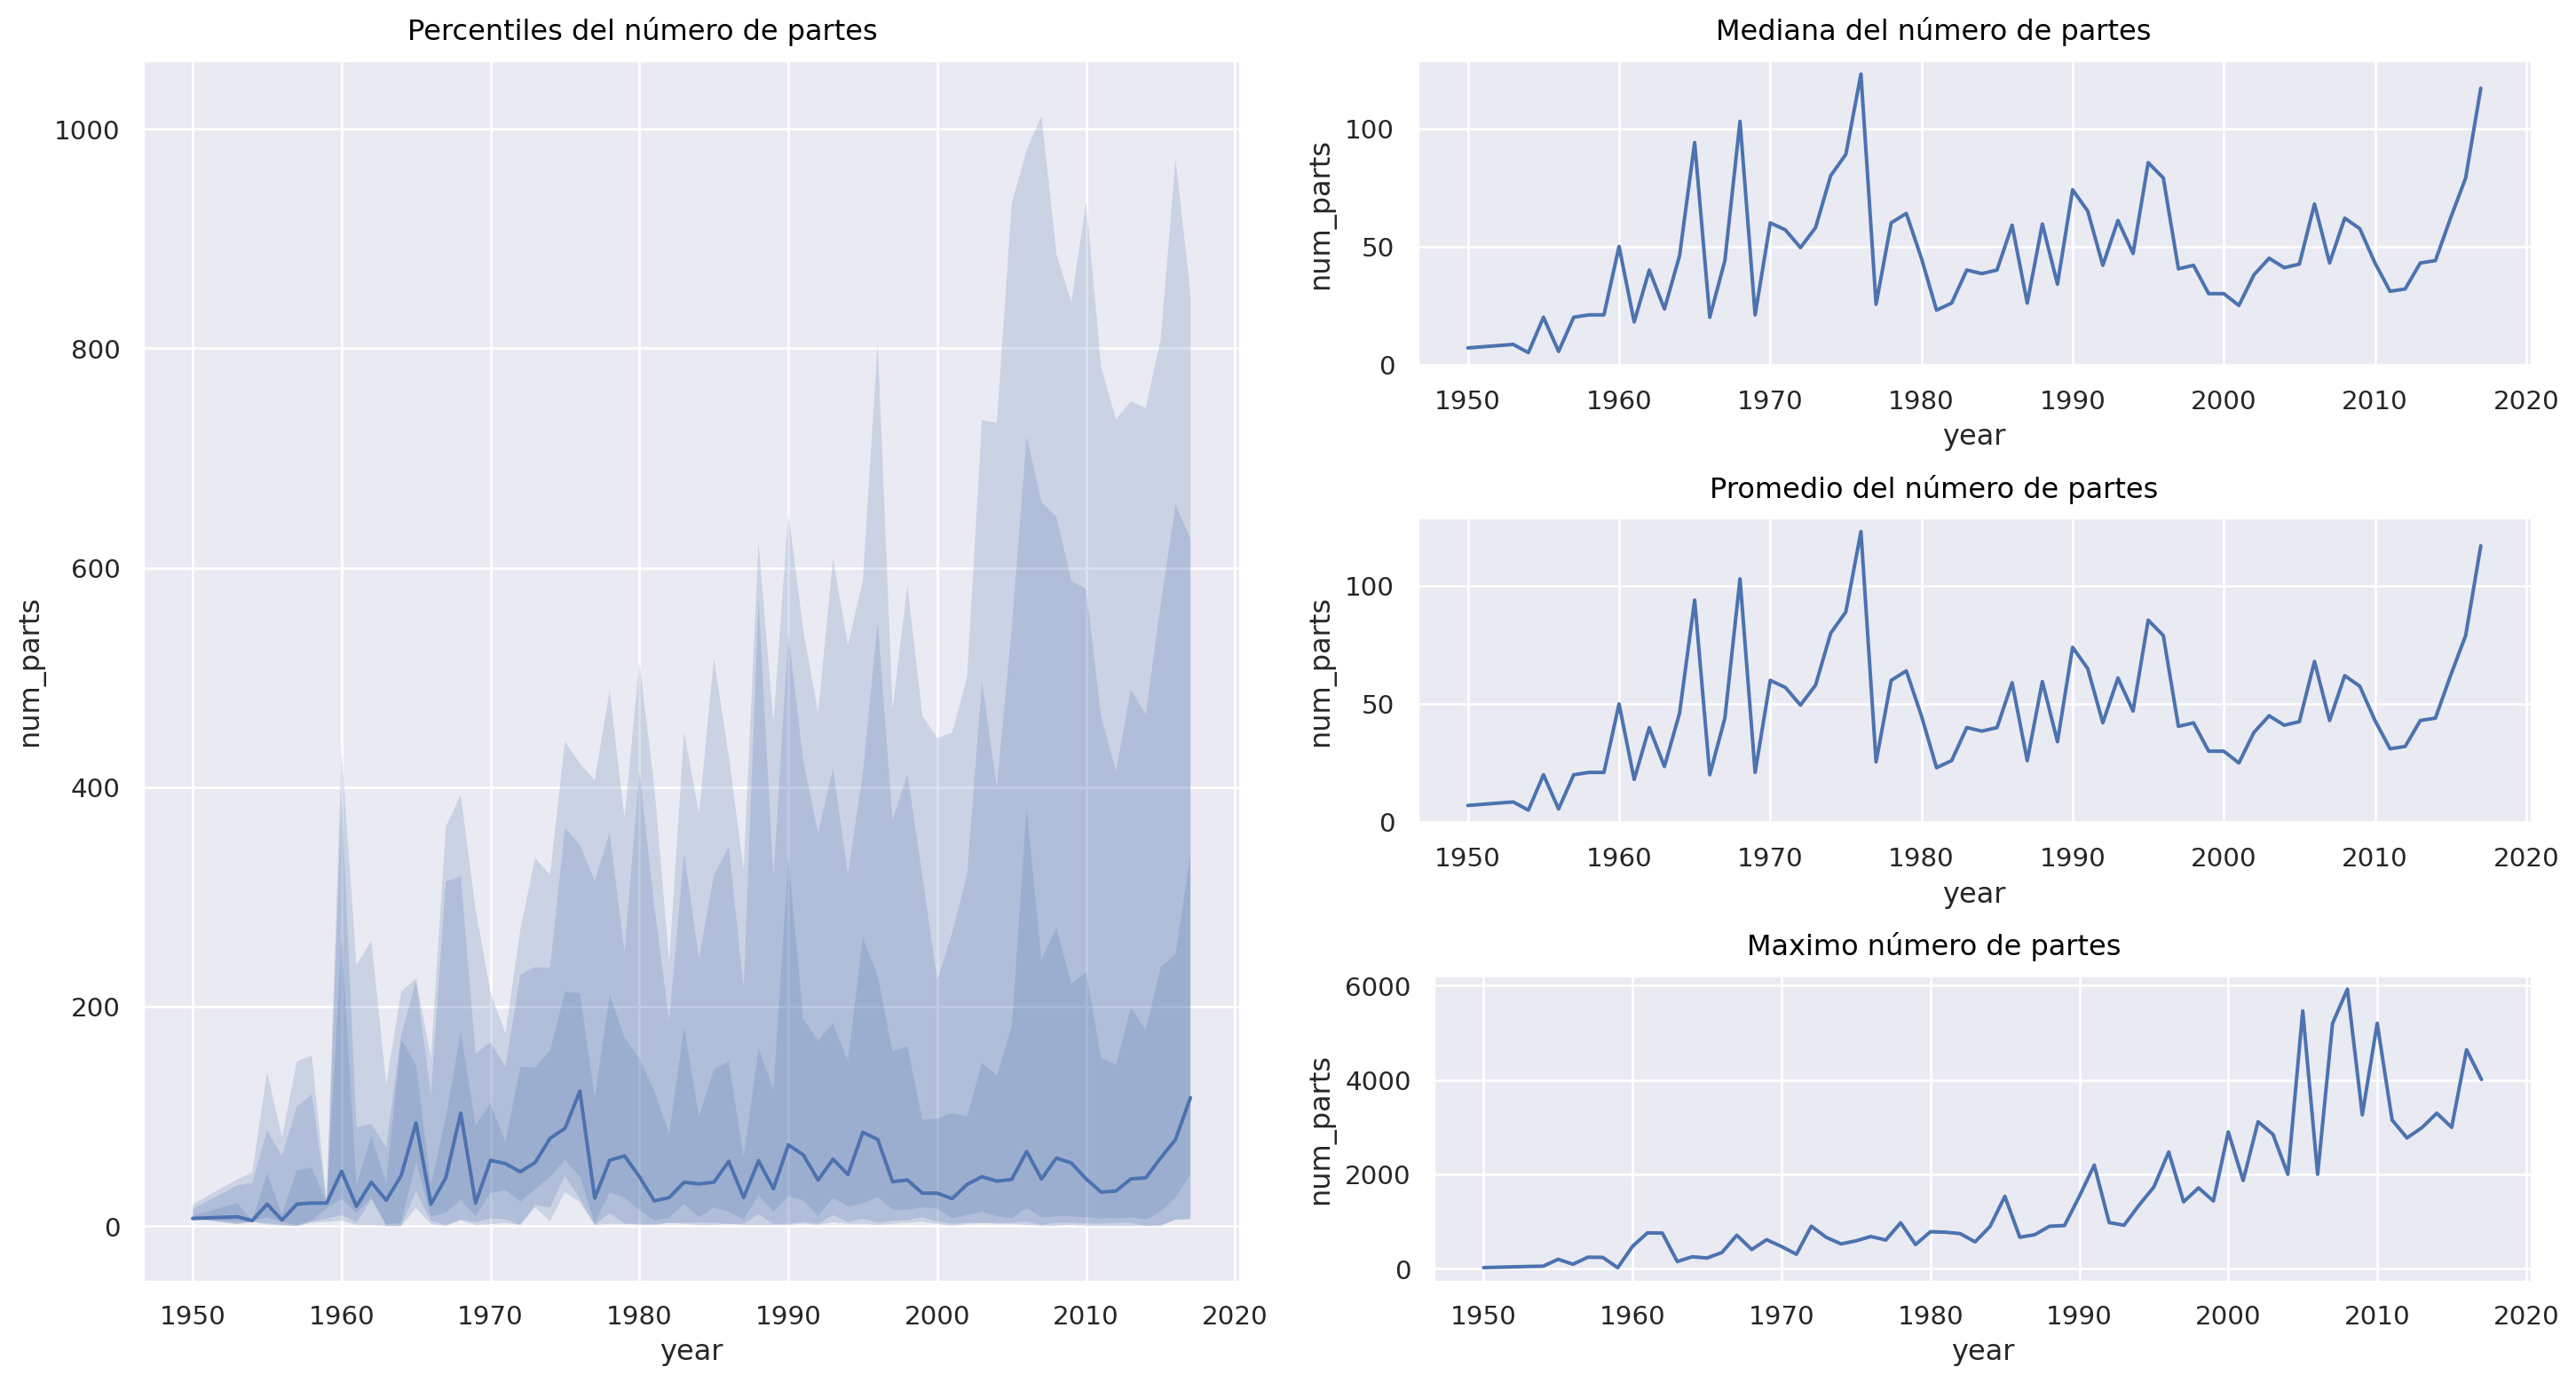

In [75]:
fig = figure.Figure(figsize=(15, 8), dpi=100, layout="constrained")
sfig1, sfig2 = fig.subfigures(1, 2)
ssfig2 = sfig2.subfigures(3, 1)
sfig1.suptitle("Percentiles del número de partes")
ssfig2[0].suptitle("Mediana del número de partes")
ssfig2[1].suptitle("Promedio del número de partes")
ssfig2[2].suptitle("Maximo número de partes")
p = so.Plot(sets_df, x="year", y="num_parts")
p.add(so.Line(), so.Agg("mean")).plot()
for tail in [50, 25, 10, 5]:
    p = p.add(so.Band(), so.Perc([tail, 100 - tail]))
p = p.add(so.Line(), so.Agg("median"))
p.on(sfig1).plot()
p = so.Plot(sets_df, x="year", y="num_parts")
p.on(ssfig2[0]).add(so.Line(), so.Agg("median")).plot()
p.on(ssfig2[1]).add(so.Line(), so.Agg("median")).plot()
p.on(ssfig2[2]).add(so.Line(), so.Agg("max")).plot()

In [92]:
df_plot = new_new_df.groupby(['color_rgb', 'theme_name']).size().reset_index().pivot(columns='color_rgb', index='theme_name', values=0)
df_plot.head()

color_rgb,000000,0020A0,0033B2,0055BF,008F9B,05131D,078BC9,0A3463,184632,1B2A34,...,FBE696,FC97AC,FCFCFC,FE8A18,FEBABD,FECCCF,FF800D,FFA70B,FFF03A,FFFFFF
theme_name,,,,,,,,,,,,,,,,,,,,,
12V,NaN,NaN,NaN,127.0,NaN,587.0,NaN,NaN,NaN,NaN,...,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,119.0
4 Juniors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4.5V,NaN,NaN,NaN,331.0,NaN,925.0,NaN,NaN,NaN,NaN,...,NaN,NaN,83.0,NaN,NaN,NaN,NaN,NaN,NaN,214.0
9V,NaN,12.0,NaN,252.0,NaN,1177.0,NaN,3.0,24.0,NaN,...,NaN,NaN,71.0,13.0,NaN,NaN,NaN,NaN,NaN,498.0
Advent,NaN,1.0,NaN,27.0,NaN,37.0,NaN,NaN,NaN,NaN,...,NaN,NaN,9.0,3.0,NaN,NaN,NaN,NaN,NaN,52.0


<Axes: xlabel='theme_name', ylabel='count'>

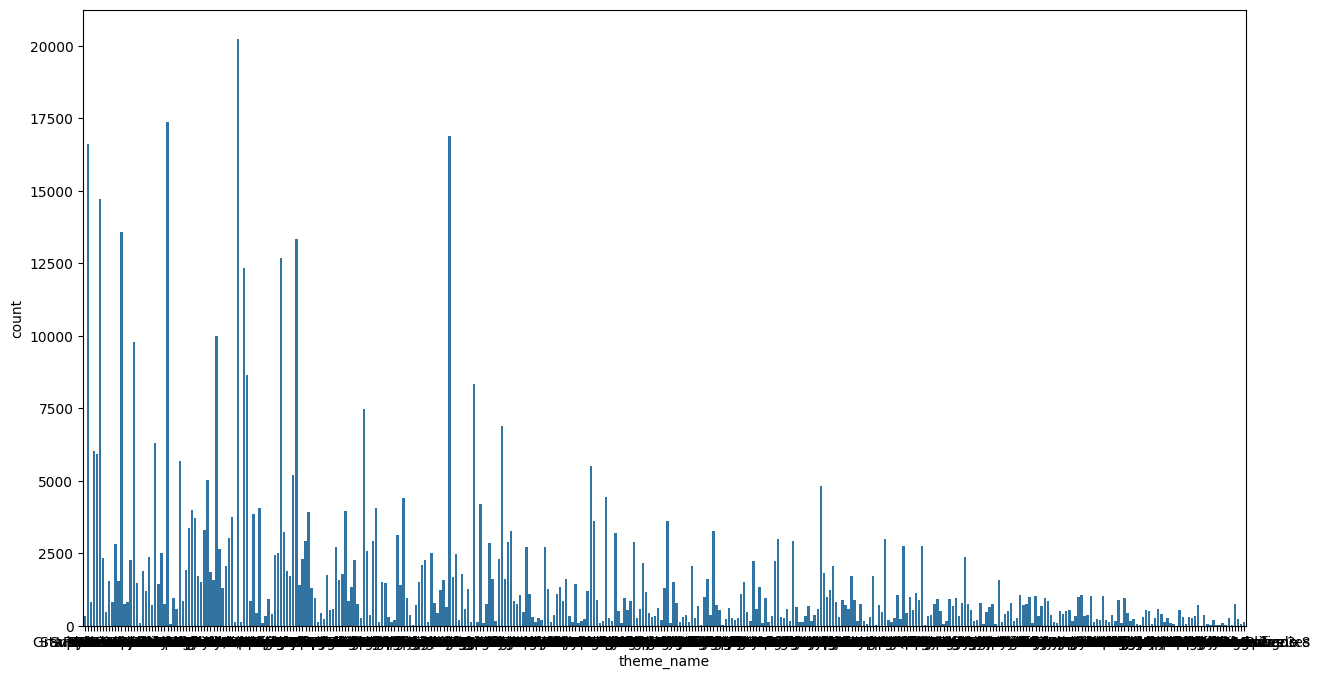

In [97]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
# sns.plot(df_plot, x="theme_name", y="color_rgb", ax=ax)
sns.countplot(data=new_new_df, x="theme_name")

/home/ggf/workspace/ceia/ceia-andd/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/ggf/workspace/ceia/ceia-andd/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


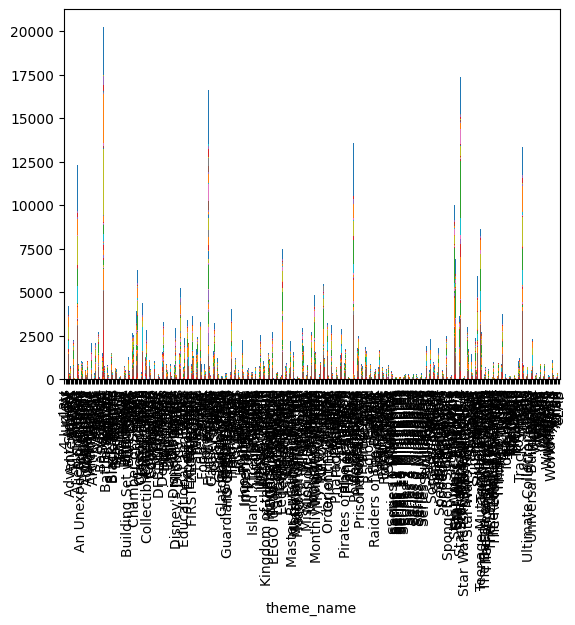

In [98]:
fig = df_plot.plot(kind='bar', stacked=True)
fig.legend([],[], frameon=False)

In [23]:
themes_df = pd.read_csv(DATASET_PATH + "themes.csv")
print("Amount of entries in themes:", len(themes_df))
themes_df.rename(columns={"id":"theme_id", "name": "theme_name", "parent_id": "theme_parent_id"}, inplace=True)
themes_df.head()

Amount of entries in themes: 614


,theme_id,theme_name,theme_parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [24]:
# add theme_name and theme_parent_id to the observations
df = pd.merge(sets_df, themes_df, on="theme_id")
df.head()

,set_num,name,year,theme_id,num_parts,theme_name,theme_parent_id
0,00-1,Weetabix Castle,1970,414,471,Castle,411.0
1,0011-2,Town Mini-Figures,1978,84,12,Supplemental,67.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,Supplemental,126.0


In [25]:
# add inventory_id to the observations
df = pd.merge(df, inventory_sets_df, on="set_num")
df.head()

,set_num,name,year,theme_id,num_parts,theme_name,theme_parent_id,inventory_id,quantity
0,00-2,Weetabix Promotional House 1,1976,413,147,Building,411.0,3574,1
1,00-3,Weetabix Promotional House 2,1976,413,149,Building,411.0,3574,1
2,00-4,Weetabix Promotional Windmill,1976,413,126,Building,411.0,3574,1
3,10000-1,Guarded Inn,2001,186,256,Castle,NaN,7474,1
4,10001-1,Metroliner,2001,233,785,Train,NaN,13941,1


In [26]:
sets_df.query("num_parts > 350")

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
22,066-1,Basic Building Set,1968,366,407
23,080-1,Basic Building Set with Train,1967,366,710
24,088-1,Super Set,1969,469,615
26,10001-1,Metroliner,2001,233,785
...,...,...,...,...,...
11231,k34433-1,Lego Mosaic Johnny Thunder,2003,277,2126
11232,k34434-1,Lego Mosaic Tiger,2003,277,2216
11417,lfv1-1,Le Fleuriste Collector Vase - Rapid Flore Pop ...,2010,301,352
11422,LIT2009-1,LEGO Inside Tour (LIT) Exclusive 2009 Edition ...,2009,301,909
